# Check the trend of investments over the years. To check the trend, find - Total number of fundings done in each year. Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.Print year-wise total number of fundings also. Print years in ascending order.

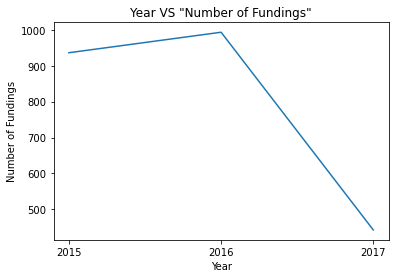

2015 936
2016 993
2017 443


In [5]:
import csv
import matplotlib.pyplot as plt
import collections
with open('Downloads/startup_funding.csv', encoding ='UTF-8') as file_obj:
    file_data = csv.DictReader(file_obj, skipinitialspace=True)
    dct = {}
    for row in file_data:
        year = row['Date'][-4:]
        if year in dct:
            dct[year] += 1
        else:
            dct[year] = 1
            
    ord_dct = collections.OrderedDict(sorted(dct.items()))                                  
    plt.plot(list(ord_dct.keys()),list(ord_dct.values()))
    plt.xlabel("Year")
    plt.ylabel("Number of Fundings")
    plt.title('Year VS "Number of Fundings"')
    plt.show()
    
    for i in ord_dct.keys():
        print(i,end=" ")
        print(ord_dct[i])


# Find out which cities are generally chosen for starting a startup. Find top 10 Indian cities which have most number of startups ? Plot a pie chart and visualise it. Print the city name and number of startups in that city also.

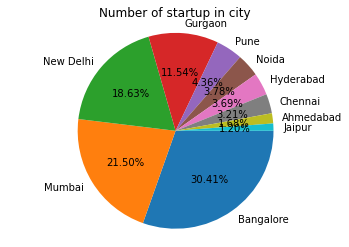

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('Downloads/startup_funding.csv', encoding ='UTF-8')

df.dropna(subset=["CityLocation"],inplace=True)

def separateCity(city): 
    return city.split('/')[0].strip() 
df['CityLocation']=df['CityLocation'].apply(separateCity) 
df[df['CityLocation']=='bangalore'] = 'Bangalore'
df[df['CityLocation']=='Delhi'] = 'New Delhi'

city = df['CityLocation']
city = city.value_counts()[:10]
city_name = city.index
no_of_str = city.values

plt.pie(no_of_str, labels=city_name, autopct='%.2f%%',counterclock=False)
plt.title('Number of startup in city')
plt.axis("equal")
plt.show()

for i in range(city_name.shape[0]):
    print(city_name[i],no_of_str[i])

# Find out if cities play any role in receiving funding.Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).Print the city and percentage with 2 decimal place after rounding off

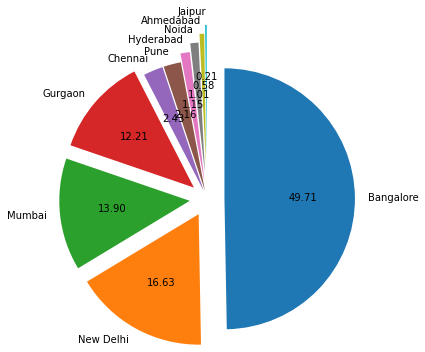

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('Downloads/startup_funding.csv', encoding ='UTF-8')
df.dropna(subset=["CityLocation"],inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]
city = df.index
amount = df.values
explode = [0.2,0.2,0.2,0.2,0.1,0.1,0.2,0.3,0.4,0.5]
plt.pie(amount,labels = city,autopct='%0.2f',counterclock=False,startangle=90,explode =explode,radius=1.5)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f'))

# There are 4 different type of investments. Find out percentage of amount funded for each investment type.Plot a pie chart to visualise.Print the investment type and percentage of amount funded with 2 decimal places after rounding off. 

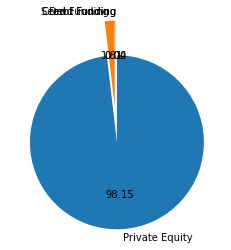

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Downloads/startup_funding.csv', encoding ='UTF-8')
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:10]
investment = df.index
amount = df.values
explode=[0.2,0.2,0.2,0.2]
plt.pie(amount,labels = investment,autopct='%0.2f',counterclock=False,startangle=90,explode=explode)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(investment)):
    print(investment[i],format(percent[i],'0.2f'))